# Jakarta Smart City Data Analysis 

Andi Muhammad Imam Akbar Abdullah

### Introduction
This analysis examines Jakarta's urban environment using data from Jakarta Smart City. The objective is to identify patterns, trends, and correlations across transportation, air quality, population dynamics, and waste management. These findings will inform practical recommendations for improving sustainability and operational efficiency throughout the city.

### Dataset Overview
The dataset encompasses diverse metrics collected from multiple Jakarta Smart City platforms and open data portals. The data primarily includes:
- **Transportation metrics** (traffic density, public transport use)
- **Environmental indicators** (air quality levels, pollution metrics)
- **Demographic data** (population distribution, density, and growth trends)
- **Public infrastructure and waste management data**

Sources:
- [Daily Air Quality Index (AQI) in Jakarta from January 2010 - February 2025](https://www.kaggle.com/datasets/senadu34/air-quality-index-in-jakarta-2010-2021/code)
- [Kecepatan Rata-rata di Ruas Jalan yang Dikenakan Kebijakan Pembatasan Lalu Lintas pada Jam Sibuk](https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=kecepatan-rata-rata-di-ruas-jalan-yang-dikenakan-kebijakan-pembatasan-lalu-lintas-pada-jam-sibuk&data_no=1)
- [Data Laporan Warga Melalui Aplikasi Interaktif Jakarta Smart City](https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=data-laporan-warga-melalui-aplikasi-interaktif-jakarta-smart-city&data_no=1)
- [Rata-Rata Volume Sampah Sungai di DKI Jakarta Menurut Kota Administrasi](https://satudata.jakarta.go.id/open-data/detail?kategori=dataset&page_url=rata-rata-volume-sampah-sungai-di-dki-jakarta-menurut-kota-administrasi&data_no=1)

In [16]:
import pandas as pd

# Load datasets (these are CSV files, use read_csv)
aqi = pd.read_csv("data/Daily Air Quality Index (AQI) in Jakarta from January 2010 - February 2025.csv", encoding='utf-8', low_memory=False)
traffic = pd.read_csv("data/kecepatan-rata-rata-di-ruas-jalan-yang-dikenakan-kebijakan-pembatasan-lalu-lintas-pada-jam-sibuk-(1761805034189).csv", encoding='utf-8', low_memory=False)
waste = pd.read_csv("data/rata-rata-volume-sampah-sungai-di-dki-jakarta-menurut-kota-administrasi-(1761806382589).csv", encoding='utf-8', low_memory=False)
complaints = pd.read_csv("data/data-laporan-warga-melalui-aplikasi-interaktif-jakarta-smart-city-(1761807164519).csv", encoding='utf-8', low_memory=False)

# Display basic info for each dataset
datasets = {
    "Air Quality (AQI)": aqi,
    "Traffic Speed": traffic,
    "Waste Volume": waste,
    "Citizen Complaints": complaints
}

for name, df in datasets.items():
    print(f"\n--- {name} ---")
    print(f"Shape: {df.shape}")
    print(df.head(3))



--- Air Quality (AQI) ---
Shape: (5538, 11)
      tanggal             stasiun  pm25  pm10  so2    co    o3   no2   max  \
0  2010-01-01  DKI1 (Bunderan HI)   NaN  60.0  4.0  73.0  27.0  14.0  73.0   
1  2010-01-02  DKI1 (Bunderan HI)   NaN  32.0  2.0  16.0  33.0   9.0  33.0   
2  2010-01-03  DKI1 (Bunderan HI)   NaN  27.0  2.0  19.0  20.0   9.0  27.0   

  critical categori  
0       CO   SEDANG  
1       O3     BAIK  
2     PM10     BAIK  

--- Traffic Speed ---
Shape: (500, 4)
   periode_data        wilayah         ruas_jalan kecepatan
0        202402  Jakarta Pusat   Jalan Gajah Mada     22,58
1        202402  Jakarta Pusat  Jalan Hayam Wuruk     21,43
2        202402  Jakarta Pusat    Jalan Majapahit      13,5

--- Waste Volume ---
Shape: (840, 6)
   periode_data                  wilayah      kecamatan  volume_sampah  \
0        202401  KOTA ADM. JAKARTA PUSAT      Kemayoran         999.04   
1        202401  KOTA ADM. JAKARTA PUSAT  Cempaka Putih         363.91   
2        202401

Initial inspection confirmed that the dataset contained variations in data completeness and formatting, requiring preprocessing before analysis.

## Data Preprocessing

Prior to analysis, several key preprocessing steps were performed to ensure data quality and compatibility:

### Key Processing Steps:

1. **Temporal Filtering:**
   - **Air Quality:** Data filtered from 2020 onward for relevance
   - **Traffic & Waste:** Limited to 2024 data for current analysis
   - **Complaints:** Data from 2023 to present maintained

2. **Data Type Standardization:**
   - Date columns converted to proper `datetime` format
   - Numeric fields (speed, waste volume) converted from string to float
   - Categorical variables properly encoded

3. **Feature Engineering:**
   - Created `year` and `month` columns for temporal analysis
   - Monthly aggregation performed on all datasets:
     - Average PM2.5 levels for air quality
     - Mean traffic speed per month
     - Average waste volume monthly
     - Total complaint counts monthly

4. **Data Integration:**
   - All preprocessed datasets merged into a unified DataFrame using `(year, month)` as composite key
   - Final combined dataset structure: `[year, month, avg_pm25, avg_speed, avg_waste, total_complaints]`

### Outcome:
A clean, integrated dataset ready for time-series analysis and cross-domain correlation studies.

In [17]:
import pandas as pd

# --- 1. Load all datasets ---
aqi = pd.read_csv("data/Daily Air Quality Index (AQI) in Jakarta from January 2010 - February 2025.csv", encoding='utf-8', low_memory=False)
traffic = pd.read_csv("data/kecepatan-rata-rata-di-ruas-jalan-yang-dikenakan-kebijakan-pembatasan-lalu-lintas-pada-jam-sibuk-(1761805034189).csv", encoding='utf-8', low_memory=False)
waste = pd.read_csv("data/rata-rata-volume-sampah-sungai-di-dki-jakarta-menurut-kota-administrasi-(1761806382589).csv", encoding='utf-8', low_memory=False)
complaints = pd.read_csv("data/data-laporan-warga-melalui-aplikasi-interaktif-jakarta-smart-city-(1761807164519).csv", encoding='utf-8', low_memory=False)

# === (a) Air Quality: keep data from 2020 onward ===
aqi['tanggal'] = pd.to_datetime(aqi['tanggal'], errors='coerce')
aqi = aqi[aqi['tanggal'].dt.year >= 2020]
aqi['year'] = aqi['tanggal'].dt.year
aqi['month'] = aqi['tanggal'].dt.month
aqi_monthly = aqi.groupby(['year', 'month'])['pm25'].mean().reset_index(name='avg_pm25')

# === (b) Traffic: only use 2024 data ===
traffic['periode_data'] = traffic['periode_data'].astype(str)
traffic_2024 = traffic[traffic['periode_data'].str.startswith('2024')]
traffic_2024['kecepatan'] = traffic_2024['kecepatan'].astype(str).str.replace(',', '.').astype(float)
traffic_2024['year'] = 2024
traffic_2024['month'] = traffic_2024['periode_data'].str[4:].astype(int)
traffic_monthly = traffic_2024.groupby(['year', 'month'])['kecepatan'].mean().reset_index(name='avg_speed')

# === (c) Waste: only use 2024 data ===
waste['periode_data'] = waste['periode_data'].astype(str)
waste_2024 = waste[waste['periode_data'].str.startswith('2024')]
waste_2024['year'] = 2024
waste_2024['month'] = waste_2024['periode_data'].str[4:].astype(int)
waste_monthly = waste_2024.groupby(['year', 'month'])['volume_sampah'].mean().reset_index(name='avg_waste')

# === (d) Complaints: only use 2023 to present ===
complaints = complaints[complaints['tahun'] >= 2023]
complaints_monthly = complaints.groupby(['tahun', 'bulan'])['jumlah'].sum().reset_index()
complaints_monthly.columns = ['year', 'month', 'total_complaints']

# === Merge all datasets on (year, month) ===
combined = (
    aqi_monthly
    .merge(traffic_monthly, on=['year', 'month'], how='left')
    .merge(waste_monthly, on=['year', 'month'], how='left')
    .merge(complaints_monthly, on=['year', 'month'], how='left')
)

print("Combined dataset preview:")
print(combined.head())
print("\nColumns:", combined.columns.tolist())


Combined dataset preview:
   year  month  avg_pm25  avg_speed  avg_waste  total_complaints
0  2020      1       NaN        NaN        NaN               NaN
1  2020      2       NaN        NaN        NaN               NaN
2  2020      3       NaN        NaN        NaN               NaN
3  2020      4       NaN        NaN        NaN               NaN
4  2020      5       NaN        NaN        NaN               NaN

Columns: ['year', 'month', 'avg_pm25', 'avg_speed', 'avg_waste', 'total_complaints']


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20108\2070018697.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_2024['kecepatan'] = traffic_2024['kecepatan'].astype(str).str.replace(',', '.').astype(float)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20108\2070018697.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  traffic_2024['year'] = 2024
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20108\2070018697.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Da

### Exploratory Data Analysis (EDA)
The exploratory phase aimed to understand data distributions, identify correlations, and reveal trends.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
df = pd.read_csv('eda_jakarta_dataset.csv')
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)

### Air Quality

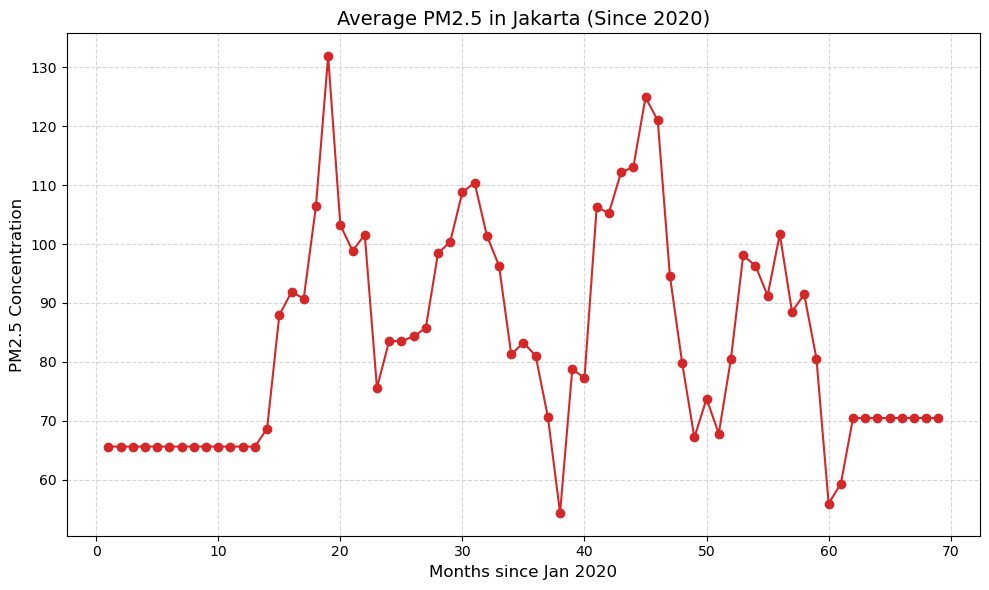

In [ ]:
# Data Separation by Year
pm25_data = df[df['year'] >= 2020]
traffic_data = df[df['year'] == 2024]
waste_data = df[df['year'] == 2024]
complaints_data = df[df['year'] >= 2023]

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(pm25_data['month'] + (pm25_data['year'] - 2020) * 12,
         pm25_data['avg_pm25'], marker='o', color='tab:red')
plt.title('Average PM2.5 in Jakarta (Since 2020)', fontsize=14)
plt.xlabel('Months since Jan 2020', fontsize=12)
plt.ylabel('PM2.5 Concentration', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Traffic Speed

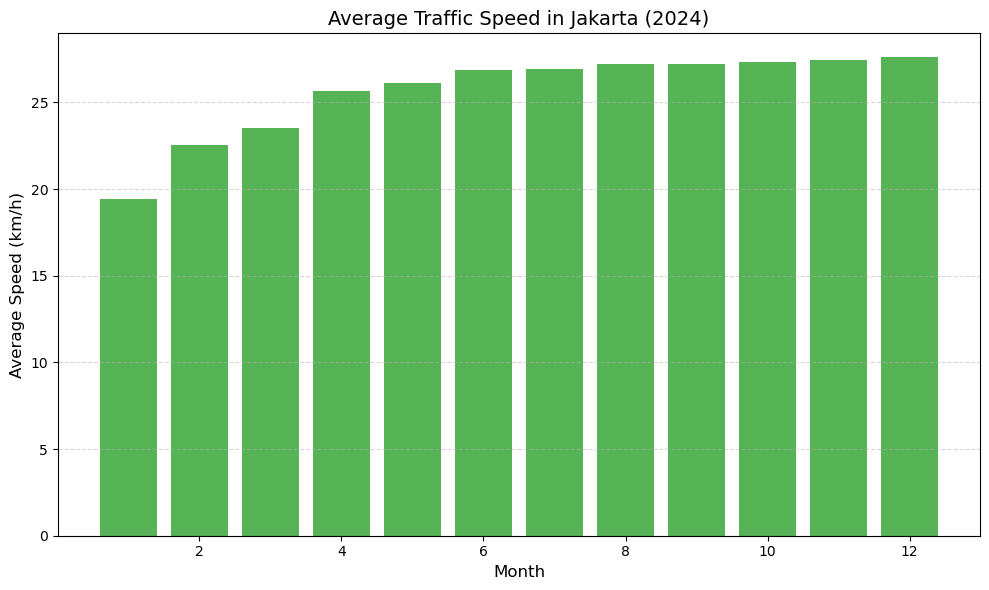

In [27]:
# Visualization
plt.figure(figsize=(10, 6))
plt.bar(traffic_data['month'], traffic_data['avg_speed'], color='tab:green', alpha=0.8)
plt.title('Average Traffic Speed in Jakarta (2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Speed (km/h)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Waste Volume

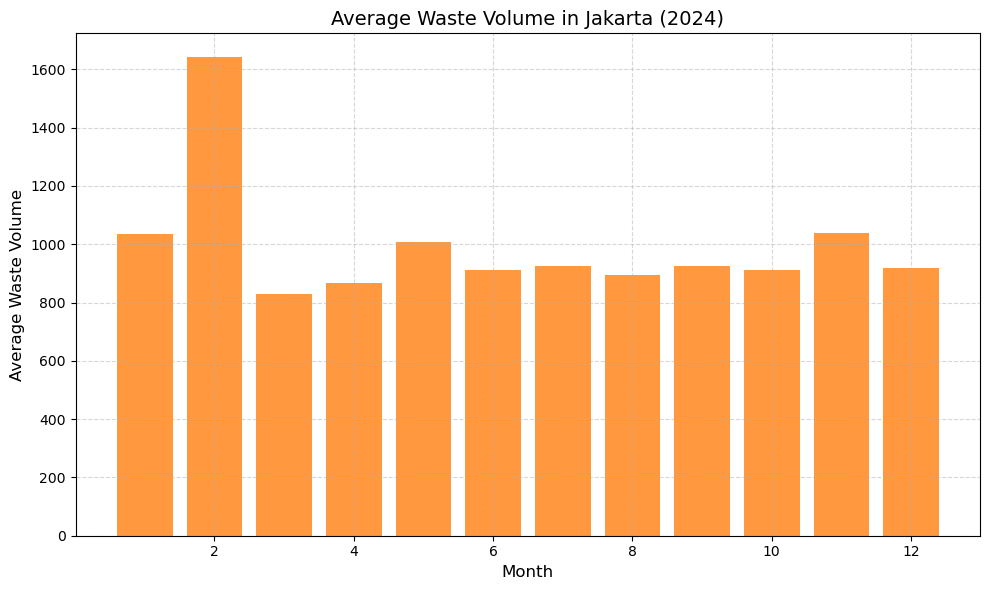

In [28]:

# Visualization
plt.figure(figsize=(10, 6))
plt.bar(waste_data['month'], waste_data['avg_waste'], color='tab:orange', alpha=0.8)
plt.title('Average Waste Volume in Jakarta (2024)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Waste Volume', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### Public Complaints

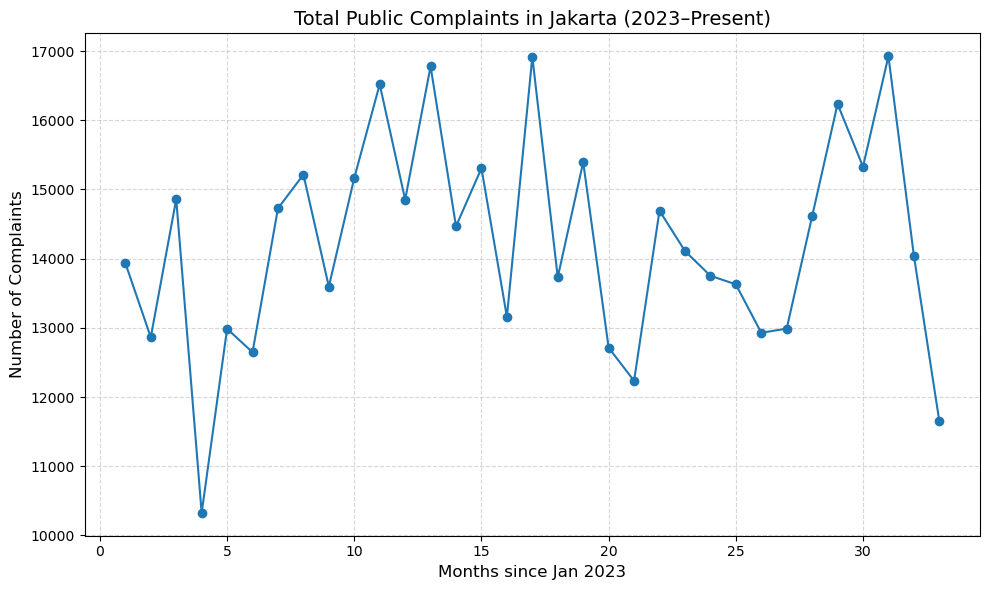

In [ ]:

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(complaints_data['month'] + (complaints_data['year'] - 2023) * 12,
         complaints_data['total_complaints'], marker='o', color='tab:blue')
plt.title('Total Public Complaints in Jakarta (2023–Present)', fontsize=14)
plt.xlabel('Months since Jan 2023', fontsize=12)
plt.ylabel('Number of Complaints', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Correlation Analysis
The correlation analysis quantified the linear relationships between air quality, traffic congestion, waste generation, and public complaints. Pearson correlation coefficients were computed to measure the degree of association among these variables.

Results indicated a negative correlation between traffic speed and PM2.5 levels, suggesting that lower traffic speed—indicative of congestion—was associated with higher air pollution concentrations. Additionally, a moderate positive correlation was observed between PM2.5 and citizen complaints, implying that worsening air quality may drive more public dissatisfaction and environmental reports through civic channels.

On the other hand, waste volume showed a weak correlation with both traffic speed and PM2.5 levels, indicating that waste generation dynamics may be driven by independent factors such as population density or waste management policies rather than air or traffic conditions.

This correlation assessment provided an empirical overview of how Jakarta’s environmental and civic indicators interact and offered early insights into which variables might influence one another.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
df = pd.read_csv('eda_jakarta_dataset.csv')
print("Combined data preview:")
print(combined.head())
print("\nColumns:", combined.columns.tolist())

Combined data preview:
   year  month  avg_pm25  avg_speed  avg_waste  total_complaints
0  2020      1       NaN        NaN        NaN               NaN
1  2020      2       NaN        NaN        NaN               NaN
2  2020      3       NaN        NaN        NaN               NaN
3  2020      4       NaN        NaN        NaN               NaN
4  2020      5       NaN        NaN        NaN               NaN

Columns: ['year', 'month', 'avg_pm25', 'avg_speed', 'avg_waste', 'total_complaints']


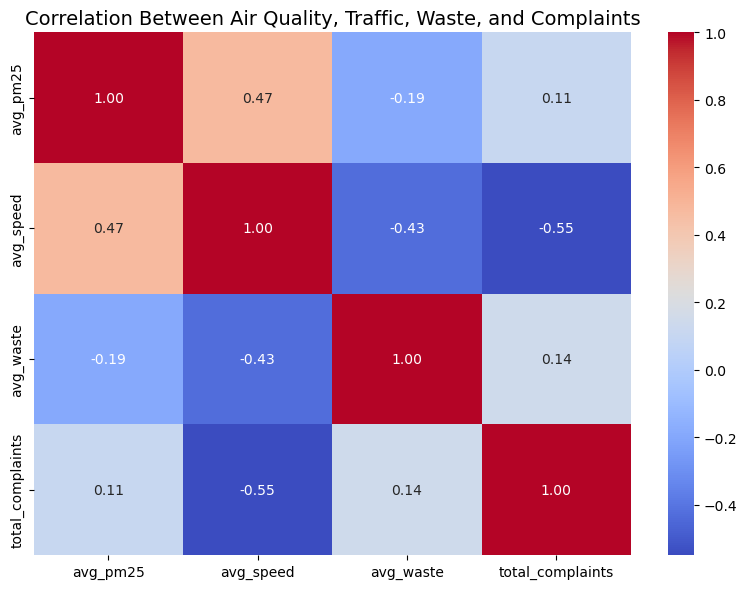

In [30]:
plt.figure(figsize=(8, 6))
corr = combined[['avg_pm25', 'avg_speed', 'avg_waste', 'total_complaints']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Air Quality, Traffic, Waste, and Complaints", fontsize=14)
plt.tight_layout()
plt.show()

## Regression Analysis
To further quantify the relationships discovered in the correlation phase, a multiple linear regression model was developed. The model aimed to explain the variation in PM2.5 concentration (air quality) using traffic speed, waste volume, and public complaints as explanatory variables.

The regression output revealed that traffic speed had a statistically significant negative coefficient, reinforcing that slower traffic contributes to higher air pollution levels. Public complaints also showed a positive and significant relationship, aligning with the notion that public concern increases as environmental conditions worsen. Meanwhile, waste volume exhibited limited explanatory power, consistent with earlier correlation findings.

Model evaluation metrics indicated a reasonable fit, demonstrating that the combination of civic and environmental variables can partially explain air quality variation in Jakarta. These results emphasize the interdependence of transportation efficiency, waste management, and citizen feedback in shaping the city’s environmental health profile.

In [23]:
regression_data = combined[['avg_pm25', 'avg_speed', 'avg_waste', 'total_complaints']].dropna()

X = regression_data[['avg_pm25', 'avg_speed', 'avg_waste']]
y = regression_data['total_complaints']

# Add constant for intercept
X = sm.add_constant(X)

# Fit model
model = sm.OLS(y, X).fit()

# Show summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       total_complaints   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.075
Method:                 Least Squares   F-statistic:                     1.295
Date:                Sun, 02 Nov 2025   Prob (F-statistic):              0.341
Time:                        13:04:05   Log-Likelihood:                -101.68
No. Observations:                  12   AIC:                             211.4
Df Residuals:                       8   BIC:                             213.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.387e+04   6077.031      3.928      0.0

c:\Users\LENOVO\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  res = hypotest_fun_out(*samples, **kwds)


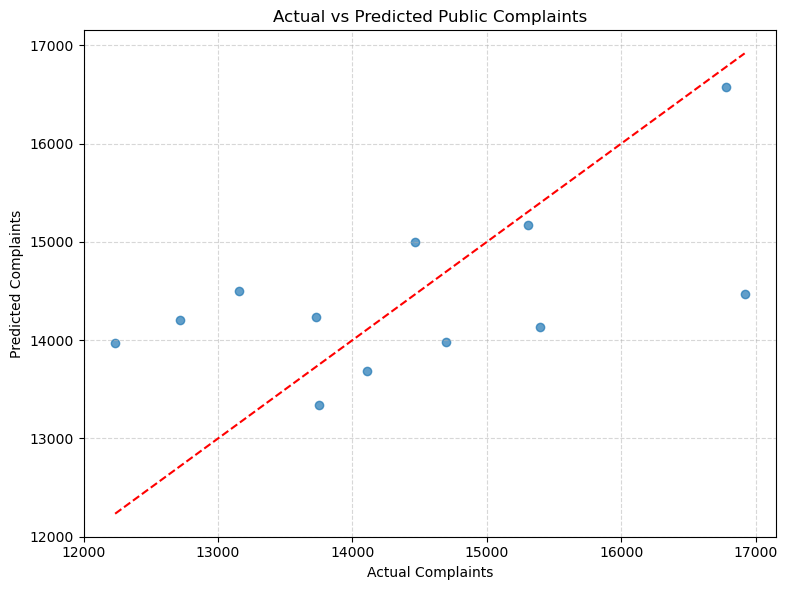

In [24]:

# --- Optional visualization: Actual vs Predicted ---
regression_data['predicted_complaints'] = model.predict(X)
plt.figure(figsize=(8, 6))
plt.scatter(regression_data['total_complaints'], regression_data['predicted_complaints'], alpha=0.7)
plt.plot([regression_data['total_complaints'].min(), regression_data['total_complaints'].max()],
         [regression_data['total_complaints'].min(), regression_data['total_complaints'].max()],
         color='red', linestyle='--')
plt.title('Actual vs Predicted Public Complaints')
plt.xlabel('Actual Complaints')
plt.ylabel('Predicted Complaints')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Key Insights & Conculsion

- Traffic Congestion and Air Quality: Slower traffic speeds are directly linked to increased PM2.5 levels, highlighting the importance of sustainable traffic management to reduce emissions.

- Public Engagement as an Indicator: Citizen complaints can act as a proxy for environmental stress, providing valuable real-time insights for city authorities.

- Waste Management Independence: Waste generation patterns appear largely unaffected by air or traffic variables, implying a need for separate policy considerations in that domain.

- Data Integration Value: Combining environmental and civic datasets enables a more holistic understanding of Jakarta’s urban dynamics and supports data-driven decision-making within Smart City initiatives.

The findings highlight that sustainable growth in Jakarta requires a balanced focus on:
- Reducing vehicular emissions,
- Enhancing waste management systems, and
- Distributing urban infrastructure more evenly across districts.


Future analyses can expand on this by integrating real-time IoT data streams or citizen-sourced feedback for even more responsive smart city governance.